![Grupo de Analítica Institucional ICBF](https://github.com/ICBF-Analitica/taller_datos_abiertos_ICBF/raw/main/assets/CabezoteModeloDatosAbiertos.png)

# Visualización de Datos con Python

## Ejemplo 1: Caracterización de Beneficiarios de las Modalidades de Prevención del ICBF

Contiene la información que da cuenta del tipo de vinculaciones y tipo de beneficiarios atendidos durante una vigencia definida en las estrategias, modalidades y programas de prevención del ICBF.

Para revisar los documentos de la API dirijase a https://dev.socrata.com/foundry/www.datos.gov.co/g58z-k6f6 se pueden realizar conexiones con diferentes herramientas como R o Stata.

In [1]:
# Sodapy paquete necesario para la conexión con los datos
!pip install sodapy

In [57]:
import pandas as pd
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
# results = client.get("g58z-k6f6", limit=2000)


results = client.get_all("g58z-k6f6")

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

df.shape

(391159, 19)

Para visualizar los primeros 5 registros utilizamos el siguiente comando

In [3]:
df.head()

a_o codigo_departamento_atenci  ... municipio_atenci_n codigo_municipio_atenci_n
0  2018                         00  ...                NaN                       NaN
1  2018                         00  ...                NaN                       NaN
2  2018                         00  ...                NaN                       NaN
3  2018                         00  ...                NaN                       NaN
4  2018                         00  ...                NaN                       NaN

[5 rows x 19 columns]

Conteo de valores no nulos y tipos de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391159 entries, 0 to 391158
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   a_o                           391159 non-null  object
 1   codigo_departamento_atenci    391159 non-null  object
 2   area_misional                 391159 non-null  object
 3   nombre_servicio               391159 non-null  object
 4   rango_edad                    391159 non-null  object
 5   sexo                          391159 non-null  object
 6   zona_ubicacion_beneficiario   391159 non-null  object
 7   agrupaci_n_etnica             391159 non-null  object
 8   grupo_etnico                  391159 non-null  object
 9   presenta_discapacidad         391159 non-null  object
 10  v_ctima                       307505 non-null  object
 11  nacionalidad                  391159 non-null  object
 12  tipo_beneficiario_homologado  391159 non-null  object
 13 

Descripción de Variable, como en este caso la toma como un tipo Objeto (Texto) nos da muy poca información

In [5]:
df.beneficiarios.describe()

count     391159
unique      1419
top            1
freq      118417
Name: beneficiarios, dtype: object

Al convertir la variable de beneficiarios a tipo Entero podemos obtener las estadisticas de los valores disponibles

In [58]:
df.beneficiarios = df.beneficiarios.astype(int)
df.beneficiarios.describe()

count    391159.000000
mean         21.082872
std         183.313936
min           1.000000
25%           1.000000
50%           3.000000
75%          12.000000
max       27561.000000
Name: beneficiarios, dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391157 entries, 0 to 391158
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   a_o                           391157 non-null  object
 1   codigo_departamento_atenci    391157 non-null  object
 2   area_misional                 391157 non-null  object
 3   nombre_servicio               391157 non-null  object
 4   rango_edad                    391157 non-null  object
 5   sexo                          391157 non-null  object
 6   zona_ubicacion_beneficiario   391157 non-null  object
 7   agrupaci_n_etnica             391157 non-null  object
 8   grupo_etnico                  391157 non-null  object
 9   presenta_discapacidad         391157 non-null  object
 10  v_ctima                       307503 non-null  object
 11  nacionalidad                  391157 non-null  object
 12  tipo_beneficiario_homologado  391157 non-null  object
 13 

## 1) Pandas

In [ ]:
import matplotlib.pyplot as plt # Para renderizar los gráficos vamos a usar matplotlib

Distribución de Beneficiarios por Departamento

In [8]:
df_agg_dpto = df.groupby(['departamento_atenci_n'])['beneficiarios'].agg('sum').reset_index()
df_agg_dpto

departamento_atenci_n  beneficiarios
0               Amazonas          33928
1              Antioquia         818785
2                 Arauca          75377
3              Atlántico         532622
4            Bogota D.C.         749471
5                Bolívar         452348
6                 Boyacá         186984
7                 Caldas         166351
8                Caquetá         108552
9               Casanare          63007
10                 Cauca         352652
11                 Cesar         308069
12                 Chocó         334667
13          Cundinamarca         257526
14               Córdoba         398187
15               Guainía          15770
16              Guaviare          42525
17                 Huila         230113
18            La Guajira         396256
19             Magdalena         367744
20                  Meta         162228
21                  NULL             83
22                Nariño         344172
23    Norte De Santander         244481
24              Putumayo          96838
25               Quindio          78644
26             Risaralda         138772
27            San Andrés          17238
28             Santander         283398
29       Sin información             56
30                 Sucre         227583
31                Tolima         225698
32       Valle Del Cauca         493046
33                Vaupés          17662
34               Vichada          25915

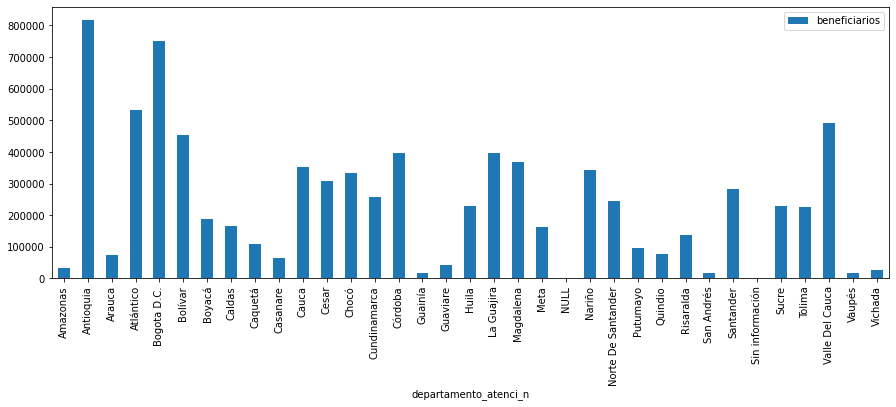

In [ ]:
df_agg_dpto.plot.bar(x='departamento_atenci_n', y='beneficiarios', figsize=(15,5))
plt.show()

Barras ordenadas

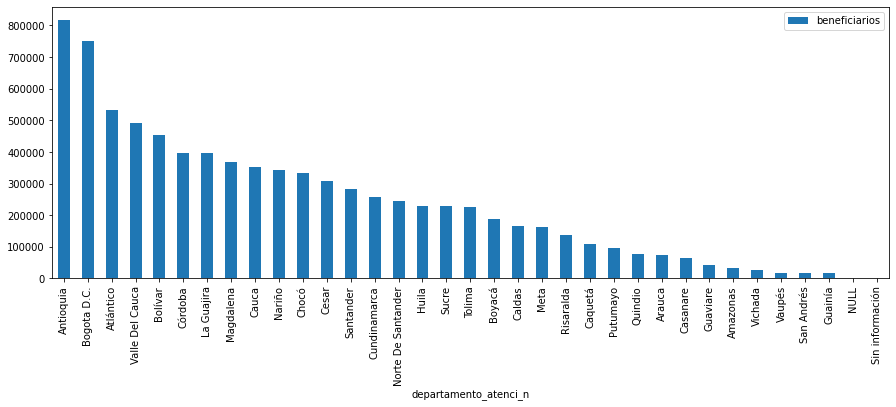

In [ ]:
df_agg_dpto.sort_values(by=['beneficiarios'], ascending=False).plot.bar(x='departamento_atenci_n',y='beneficiarios', figsize=(15,5))
plt.show()

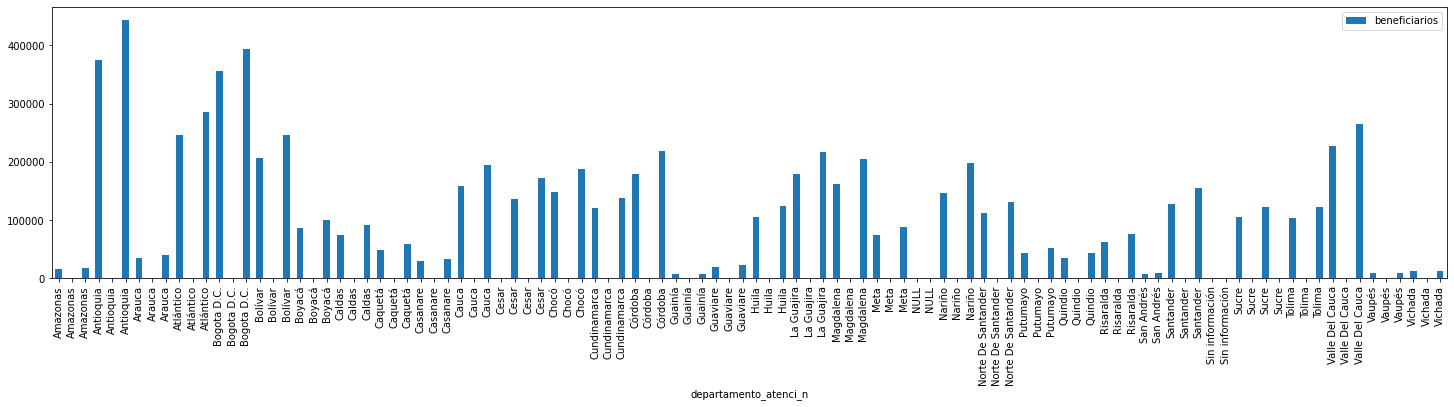

In [11]:
df.groupby(['departamento_atenci_n','sexo'])['beneficiarios'].agg('sum').reset_index().plot.bar(x='departamento_atenci_n', y='beneficiarios', figsize=(25,5))

Filtro de observaciones

In [ ]:
df.groupby(['sexo'])['beneficiarios'].agg('sum').reset_index()

sexo  beneficiarios
0         -              1
1    Hombre        3758745
2  Intersex            499
3     Mujer        4487509
4         f              1

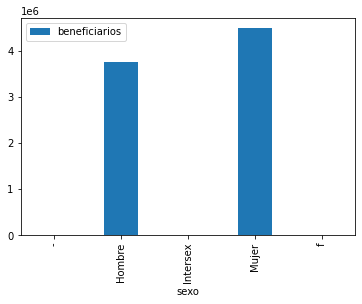

In [ ]:
df.groupby(['sexo'])['beneficiarios'].agg('sum').reset_index().plot.bar(x='sexo',y='beneficiarios')
plt.show()

In [7]:
df = df[(df['sexo']!='-') & (df['sexo']!='f')] # Filtro por la variable sexo
df.groupby(['sexo'])['beneficiarios'].agg('sum').reset_index()

sexo  beneficiarios
0    Hombre        3758745
1  Intersex            499
2     Mujer        4487509

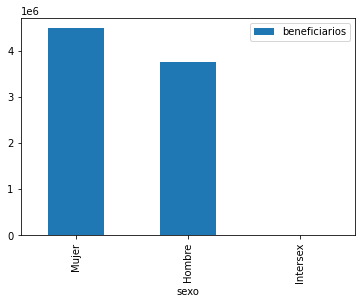

In [ ]:
df.groupby(['sexo'])['beneficiarios'].agg('sum').reset_index().sort_values(by=['beneficiarios'], ascending=False).plot.bar(x='sexo',y='beneficiarios')
plt.show()

Filtro con función .loc

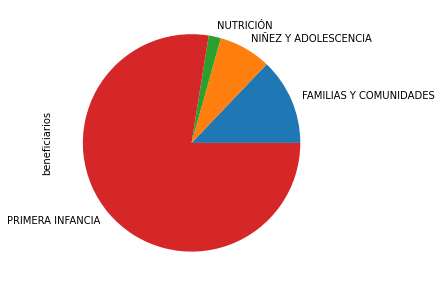

In [ ]:
df.loc[df.a_o=="2018"].groupby(['area_misional'])['beneficiarios'].agg('sum').plot.pie(y='beneficiarios', figsize=(5, 5))
plt.show()

In [13]:
 df_sex = df.groupby(['a_o','departamento_atenci_n','sexo'])['beneficiarios'].agg('sum').reset_index()
 df_sex.head()

a_o departamento_atenci_n    sexo  beneficiarios
0  2018              Amazonas  Hombre           5085
1  2018              Amazonas   Mujer           6035
2  2018             Antioquia  Hombre         135669
3  2018             Antioquia   Mujer         163909
4  2018                Arauca  Hombre          11936

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


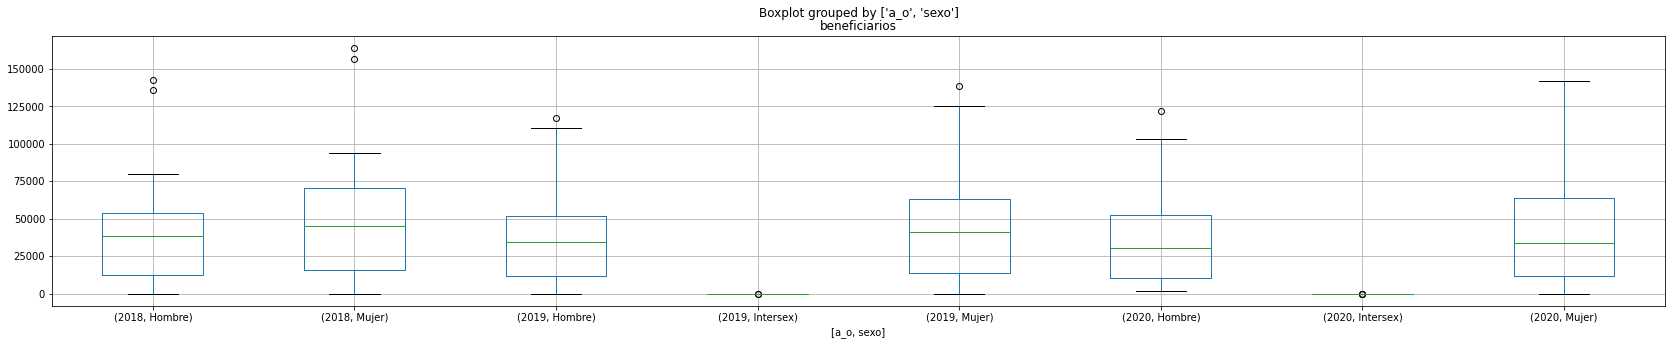

In [ ]:
df_sex.boxplot(column=['beneficiarios'], by=['a_o','sexo'], figsize=(28, 5))
plt.show()

## 2) MatplotLib

Para mayor información ingrese a la página web oficial de Matplotlib: https://matplotlib.org/

 
Instalación: Matplotlib ya viene instalado en Colaboratory. De todas maneras, para instalar el módulo en otro ambiente se hace con el siguiente comando:

    pip install matplotlib

Importamos el módulo **matplotlib.pyplot** como **plt**  (convención):

In [16]:
import matplotlib.pyplot as plt

### Ejemplo Básico

In [14]:
import numpy as np
x = np.linspace(0, 5, 11) 
y = x ** 2 
print(x)
print(y)            

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]


**Existen 2 formas de trabajar con matplotlib: método funcional y método orientado a objetos.**

**Funcional**

En el modo funcional se usa la función plot, a la cual le son pasados los datos a diagramar, para el caso del ejemplo, se pasan como argumentos los arreglos 'x' y 'y'

In [ ]:
plt.plot?

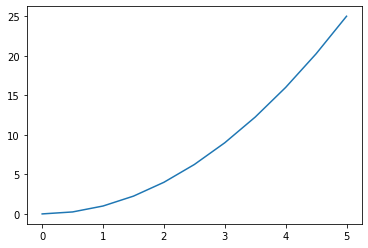

In [ ]:
plt.plot(x, y)
plt.show()

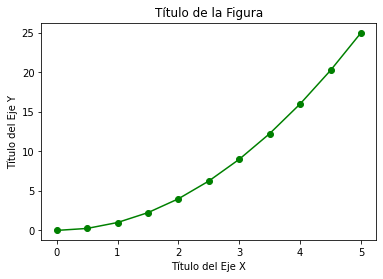

In [ ]:
plt.plot(x, y, 'g', marker='o') # 'r' define el color rojo (red), 'marker' define la representación de cada par de datos
plt.xlabel('Título del Eje X')
plt.ylabel('Título del Eje Y')
plt.title('Título de la Figura')
plt.show() # si no 

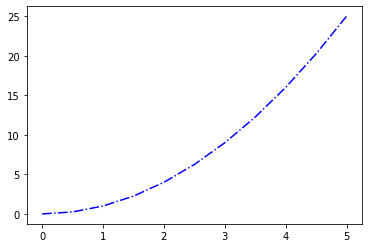

In [ ]:
plt.plot(x, y, 'b-.')
#plt.show()

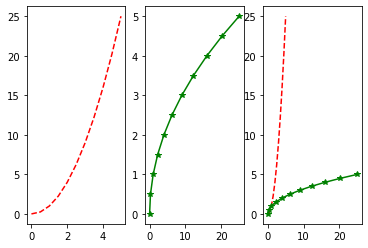

In [ ]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,3,1)      # 1 fila, 3 columnas y se esta referenciando el número 1
plt.plot(x, y, 'r--')
plt.subplot(1,3,2)      # ahora se referencia el plot número 2
plt.plot(y, x, 'g*-')
plt.subplot(1,3,3)      # ahora se referencia el plot número 3
plt.plot(x, y, 'r--')
plt.plot(y, x, 'g*-')
plt.show()

**Orientado a Objetos**

La lógica consiste en  crear objetos de la clase Figura y luego emplear métodos o atributos de ese objeto. Este enfoque es más práctico cuando se trata de un canvas que tiene múltiples gráficos en él.

Para comenzar, creamos una instancia de figura, posteriormente se agregan los ejes a esa figura, los ejes se adicionan con la función add_axes(), la cual recibe como parametros valores entre cero y uno en notación decimal que representan en forma porcentual la posición de los ejes (izquierda, abajo), y las dimensiones de estos (ancho, alto):

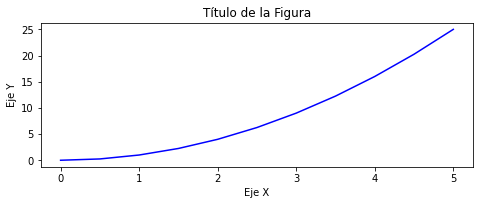

In [21]:
fig = plt.figure()   #Creamos una Figura (canvas vacío) 
axes = fig.add_axes([1, 1, 1, 0.5])   #añadimos los ejes
axes.plot(x, y, 'b')     # 'b' hace referencia al color azul (blue)
axes.set_xlabel('Eje X') # Nótese el uso de "set_" al principio del nombre de los métodos
axes.set_ylabel('Eje Y')
axes.set_title('Título de la Figura')

fig.show()

In [19]:
fig.add_axes?

In [ ]:
axes.set_xlabel?

### Caracterización de Beneficiarios con Matplotlib

Agregación de beneficiarios por año

In [22]:
dist_anual = df.groupby(['a_o'])['beneficiarios'].agg('sum')
dist_anual

a_o
2018    2950354
2019    2743769
2020    2552630
Name: beneficiarios, dtype: int64

Agregación de beneficiarios por año y sexo

In [23]:
dist_anual_sex = pd.pivot_table(df, values=['beneficiarios'], index=['a_o'], columns=['sexo'], aggfunc='sum')
dist_anual_sex = dist_anual_sex.fillna(0)
dist_anual_sex

beneficiarios                    
sexo        Hombre Intersex      Mujer
a_o                                   
2018     1331062.0      0.0  1619292.0
2019     1247961.0    227.0  1495581.0
2020     1179722.0    272.0  1372636.0

Agregación de beneficiarios por año y área misional

In [24]:
dist_mision = pd.pivot_table(df, values=['beneficiarios'], index=['a_o'], columns=['area_misional'], aggfunc='sum')
dist_mision

beneficiarios  ...                 
area_misional FAMILIAS Y COMUNIDADES  ... PRIMERA INFANCIA
a_o                                   ...                 
2018                          379805  ...          2287266
2019                          251765  ...          2149367
2020                          278680  ...          1966732

[3 rows x 4 columns]

Con el comando `DataFrame.columns` se pueden observar los nombres de las columnas

In [25]:
dist_mision.columns

MultiIndex([('beneficiarios', 'FAMILIAS Y COMUNIDADES'),
            ('beneficiarios',   'NIÑEZ Y ADOLESCENCIA'),
            ('beneficiarios',              'NUTRICIÓN'),
            ('beneficiarios',       'PRIMERA INFANCIA')],
           names=[None, 'area_misional'])

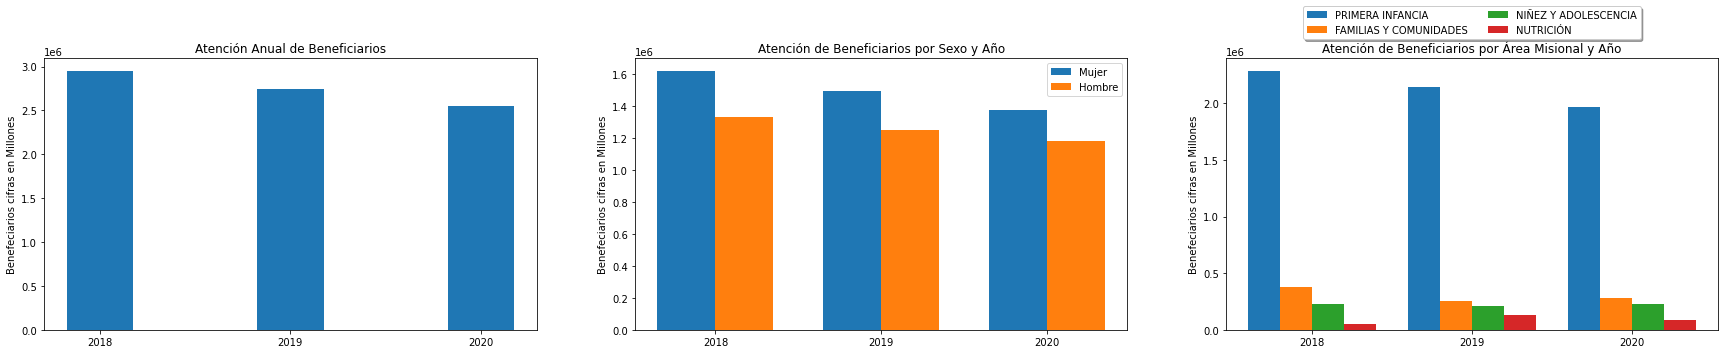

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5))

x = np.arange(len(dist_anual))  # localizacion de los labels
width = 0.35  # ancho de las barras

axes[0].bar(x, dist_anual,  width, label='Beneficiarios') 
axes[0].set_xticks(x)
axes[0].set_xticklabels(dist_anual.index)
axes[0].set_ylabel('Benefeciarios cifras en Millones')
axes[0].set_title("Atención Anual de Beneficiarios")


axes[1].bar(x - width/2, dist_anual_sex[('beneficiarios',    'Mujer')], width, label='Mujer')
axes[1].bar(x + width/2, dist_anual_sex[('beneficiarios',   'Hombre')], width, label='Hombre')
axes[1].set_ylabel('Benefeciarios cifras en Millones')
axes[1].set_title('Atención de Beneficiarios por Sexo y Año')
axes[1].set_xticks(x)
axes[1].set_xticklabels(dist_anual_sex.index)
axes[1].legend()


width = 0.2
axes[2].bar(x - (width * 1.5), dist_mision[('beneficiarios',   'PRIMERA INFANCIA')],  width, label='PRIMERA INFANCIA')
axes[2].bar(x - (width * .5), dist_mision[('beneficiarios',   'FAMILIAS Y COMUNIDADES')], width, label='FAMILIAS Y COMUNIDADES')
axes[2].bar(x + (width * .5), dist_mision[('beneficiarios',   'NIÑEZ Y ADOLESCENCIA')],  width, label='NIÑEZ Y ADOLESCENCIA')
axes[2].bar(x + (width * 1.5), dist_mision[('beneficiarios',   'NUTRICIÓN')],  width, label='NUTRICIÓN')
axes[2].set_ylabel('Benefeciarios cifras en Millones')
axes[2].set_title('Atención de Beneficiarios por Área Misional y Año')
axes[2].set_xticks(x)
axes[2].set_xticklabels(dist_mision.index)
axes[2].legend(loc=8, bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

plt.show()



In [ ]:
fig.legend?

## 3) Seaborn

http://seaborn.pydata.org/index.html

Instalación:

Seaborn ya viene instalado en Colaboratory. Para instalar el módulo en otro ambiente se hace con el siguiente comando:

    pip install seaborn

### Atención beneficiarios por grupo étnico

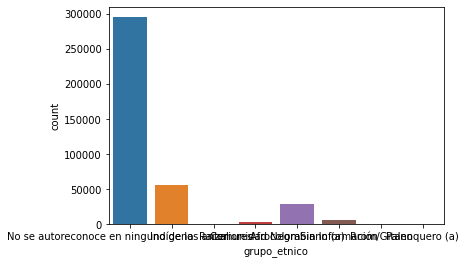

In [30]:
sns.countplot(x='grupo_etnico',data=df)
plt.show()

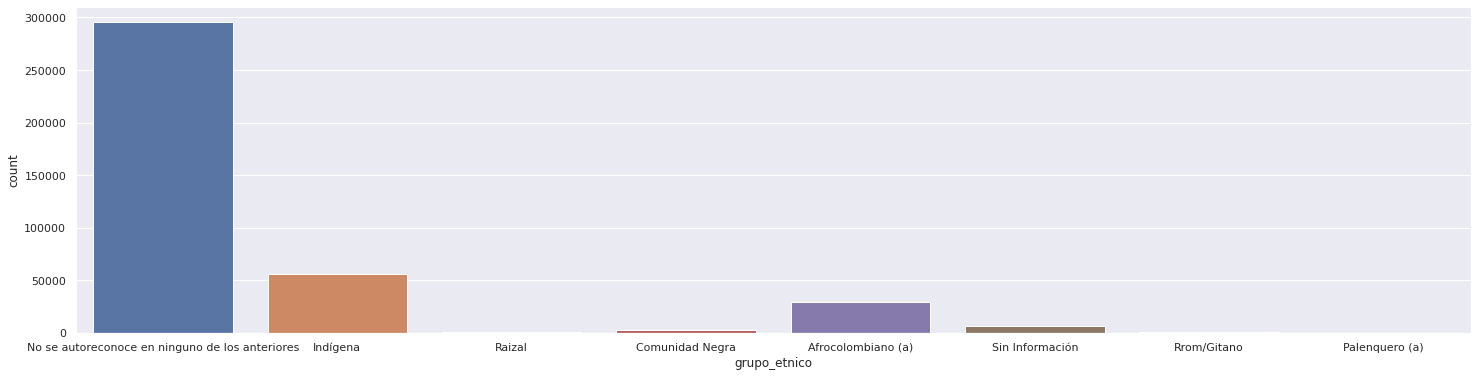

In [32]:
sns.set(rc={'figure.figsize':(25,6)})
sns.countplot(x='grupo_etnico',data=df)
plt.show()

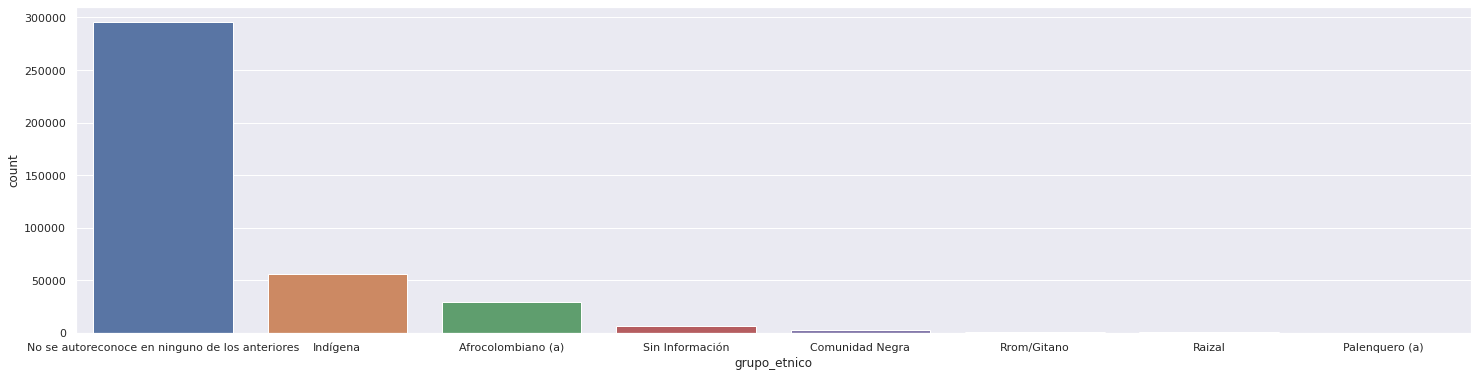

In [36]:
order = df['grupo_etnico'].value_counts().index
sns.countplot(x='grupo_etnico', data=df, order=order)
plt.show()

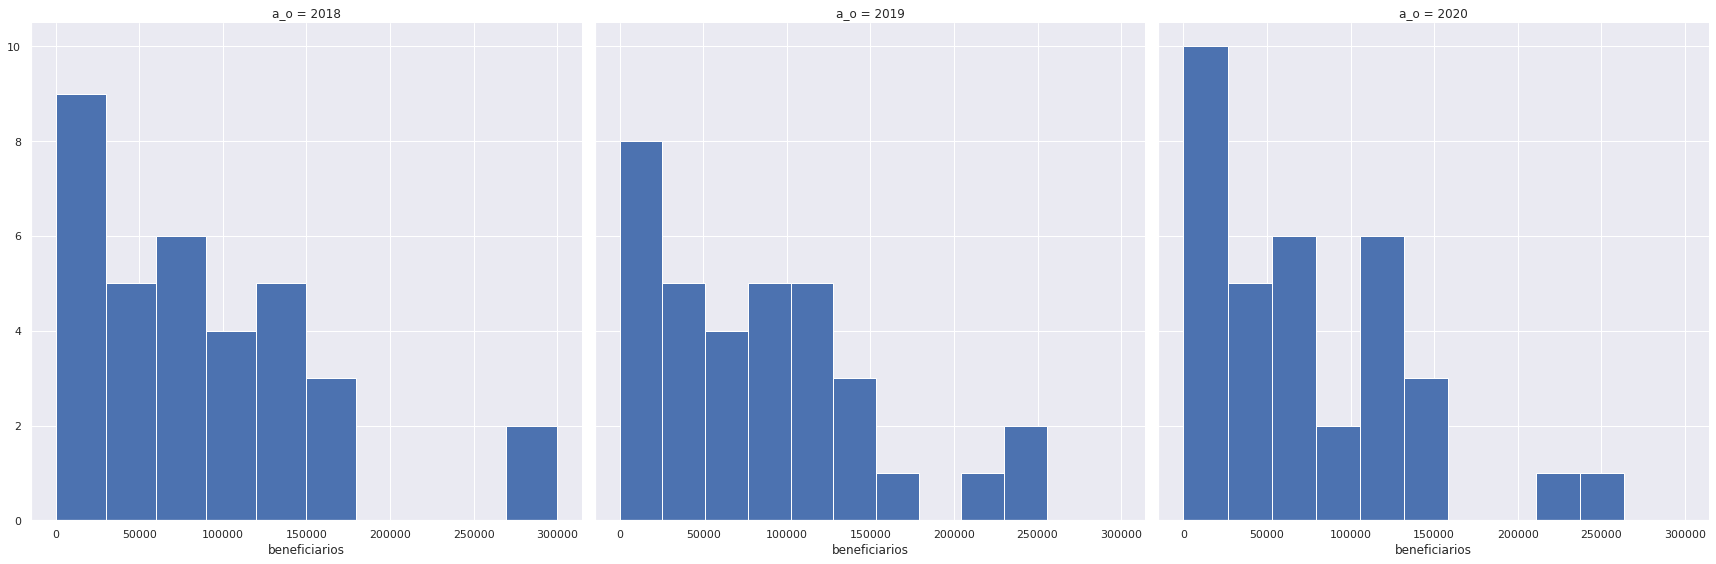

In [37]:
df_agg = df.groupby(['a_o','departamento_atenci_n'])['beneficiarios'].agg('sum').reset_index()

g = sns.FacetGrid(data=df_agg,col='a_o', height=8)
g.map(plt.hist,'beneficiarios')
plt.show()

### Ejemplo con datos de Seaborn

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  Female

[5 rows x 7 columns]

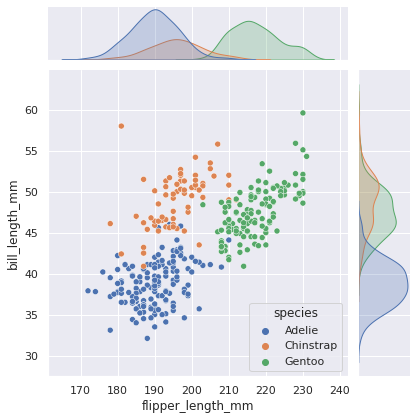

In [ ]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

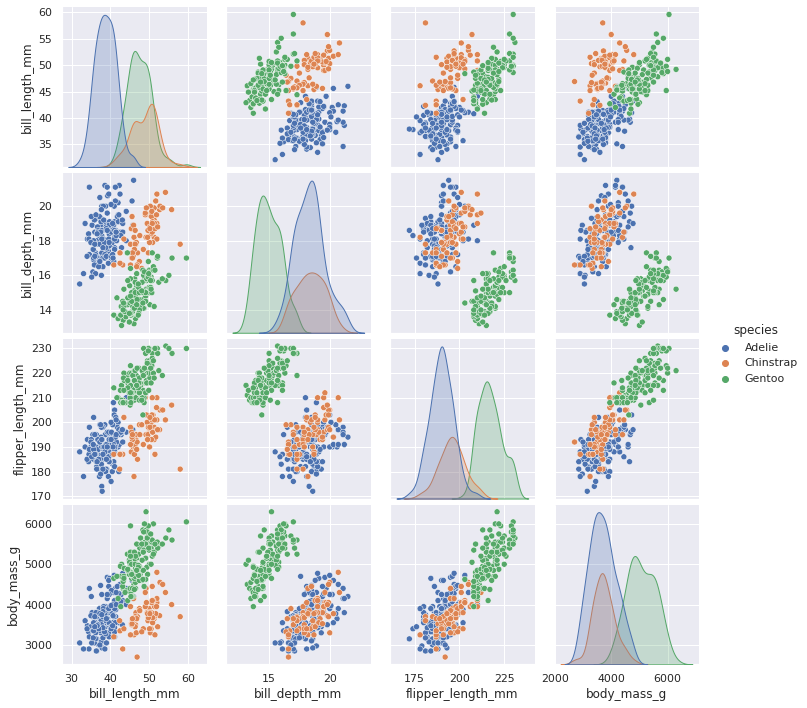

In [ ]:
sns.pairplot(data=penguins, hue="species")

## 4) Plotly

https://plotly.com/python/ 

In [39]:
import plotly.express as px

### Beneficiarios

Beneficiarios por rango de edad, área misional y sexo en el año 2018



In [53]:
fig = px.scatter(df.query("a_o=='2018'"), x="rango_edad", y="beneficiarios", color="area_misional", symbol="sexo")
fig.update_xaxes(categoryorder='array', categoryarray= ['0-6 Meses','0 - 5 años','6 Meses - 5 años','6 - 8 Años','9 - 13 Años','14 - 17 Años','Mayor a 18 Años','Sin información'])
fig.show()

In [55]:
df.a_o = df.a_o.astype(str)

Beneficiarios de la ciudad de Medellín por año y área misional


In [59]:
fig = px.bar(df.query("municipio_atenci_n=='Medellin'"), x='a_o', y='beneficiarios', color='area_misional',
             labels={'pop':'Beneficiarios en Antioquia'}, height=500, title="Beneficiarios Medellín")
fig.show()

In [60]:
df_agg = df.groupby(['a_o','municipio_atenci_n','area_misional'])['beneficiarios'].agg('sum').reset_index()

In [61]:
fig = px.bar(df_agg.query("municipio_atenci_n=='Medellin'"), x='a_o', y='beneficiarios', color='area_misional',
             labels={'pop':'Beneficiarios en Antioquia'}, height=500, title="Beneficiarios Medellin")
fig.show()

Más información sobre gráficos de barras https://plotly.com/python/bar-charts/

### Ejemplo set de datos gapminder de plotly

In [ ]:
data = px.data.gapminder()

fig = px.scatter(data.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

## Ejemplo 2: Unidades de Servicio (UDS) en Primera Infancia ICBF

Este conjunto de datos presenta las Unidades de Servicio (UDS) activas a la fecha de corte que prestan los servicios de primera infancia del ICBF por medio de las cuales se atiende a las niñas, niños y las mujeres gestantes.

## 5) Folium

https://python-visualization.github.io/folium/modules.html


In [ ]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("i8ww-5mcf", limit=500)


# Convert to pandas DataFrame
df1 = pd.DataFrame.from_records(results)



In [ ]:
df1.head()

vigencia  ...                                    geocoded_column
0     2019  ...  {'type': 'Point', 'coordinates': [-75.33817777...
1     2019  ...  {'type': 'Point', 'coordinates': [-75.32955833...
2     2019  ...  {'type': 'Point', 'coordinates': [-75.33195833...
3     2019  ...  {'type': 'Point', 'coordinates': [-75.3294, 6....
4     2019  ...  {'type': 'Point', 'coordinates': [-75.32905555...

[5 rows x 15 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   vigencia                  500 non-null    object
 1   codigo_regional           500 non-null    object
 2   nombre_regional           500 non-null    object
 3   nombre_centro_zonal       500 non-null    object
 4   codigo_dane_departamento  500 non-null    object
 5   departamento              500 non-null    object
 6   codigo_dane_municipio     500 non-null    object
 7   municipio                 500 non-null    object
 8   codigo_unidad_servicio    500 non-null    object
 9   nombre_unidad_servicio    500 non-null    object
 10  zona_ubicacion            500 non-null    object
 11  direccion                 500 non-null    object
 12  estado                    500 non-null    object
 13  fecha_de_corte            500 non-null    object
 14  geocoded_column           

In [ ]:
type(df1.geocoded_column[0])

dict

In [ ]:
df1.geocoded_column[0]

{'coordinates': [-75.3381777777778, 6.433558333], 'type': 'Point'}

In [ ]:
pd.Series(df1["geocoded_column"])[0]['coordinates']

[-75.3381777777778, 6.433558333]

In [ ]:
df1['coordenadas'] = df1["geocoded_column"].apply(pd.Series)["coordinates"]

In [ ]:
df1[['longitud','latitud']] = pd.DataFrame(df1['coordenadas'].tolist(), index= df1.index)

In [ ]:
df1.head()

vigencia codigo_regional  ...   longitud   latitud
0     2019              05  ... -75.338178  6.433558
1     2019              05  ... -75.329558  6.440472
2     2019              05  ... -75.331958  6.440258
3     2019              05  ... -75.329400  6.436356
4     2019              05  ... -75.329056  6.440933

[5 rows x 18 columns]

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[6.2476, -75.5658], zoom_start=11
# ,tiles='CartoDB positron'
 ,tiles="Stamen Terrain"
# ,tiles="Stamen Toner"
)

# Marcadores UDS
for _, r in df1.iterrows():
  folium.Marker(location=[r["latitud"],r["longitud"]],
                popup='Regional: {} <br> UDS: {}'.format(r['nombre_regional'], r['nombre_unidad_servicio']),  
                tooltip = 'UDS: {}'.format(r['nombre_unidad_servicio'])).add_to(m)
# Círculo Fijo
folium.Circle(
    radius=500,
    location=[6.208904, -75.567715],
    popup="Parque Lleras",
    color="crimson",
    fill=False,
).add_to(m)

# Círculo Marcador se ajusta al zoom
folium.CircleMarker(
    location=[6.2476, -75.5658],
    radius=50,
    popup="Medellin",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)


m